## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2022-06-28 15:15:22.332491: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/Users/parthsharma/Important/Plant-Leaf-Disease-Prediction-main/Dataset/train'
valid_path = '/Users/parthsharma/Important/Plant-Leaf-Disease-Prediction-main/Dataset/val'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('/Users/parthsharma/Important/Plant-Leaf-Disease-Prediction-main/Dataset/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/Users/parthsharma/Important/Plant-Leaf-Disease-Prediction-main/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3033 images belonging to 19 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/Users/parthsharma/Important/Plant-Leaf-Disease-Prediction-main/Dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1591 images belonging to 19 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/Users/parthsharma/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-06-28 15:15:37.511641: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
95/95 [==============================] - 148s 2s/step - loss: 3.8018 - accuracy: 0.7567 - val_loss: 3.9974 - val_accuracy: 0.7121
Epoch 2/20
95/95 [==============================] - 154s 2s/step - loss: 1.2717 - accuracy: 0.8810 - val_loss: 5.0646 - val_accuracy: 0.6694
Epoch 3/20
95/95 [==============================] - 141s 1s/step - loss: 0.9864 - accuracy: 0.9100 - val_loss: 2.5224 - val_accuracy: 0.8209
Epoch 4/20
95/95 [==============================] - 140s 1s/step - loss: 0.5830 - accuracy: 0.9400 - val_loss: 2.5595 - val_accuracy: 0.8284
Epoch 5/20
95/95 [==============================] - 139s 1s/step - loss: 0.3103 - accuracy: 0.9637 - val_loss: 2.4532 - val_accuracy: 0.8322
Epoch 6/20
95/95 [==============================] - 138s 1s/step - loss: 0.3544 - accuracy: 0.9552 - val_loss: 2.7019 - val_accuracy: 0.8215
Epoch 7/20
95/95 [==============================] - 139s 1s/step - loss: 0.4200 - accuracy: 0.9585 - val_loss: 2.7510 - val_accuracy: 0.8454
Epoch 8/20
95

In [15]:
import matplotlib.pyplot as plt

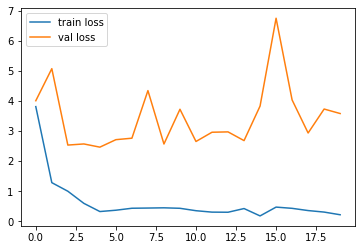

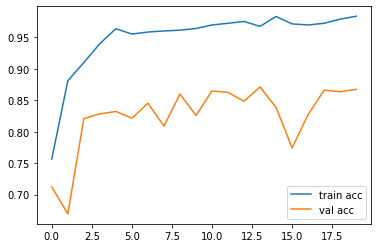

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [34]:

y_pred = model.predict(test_set)


In [19]:
y_pred

array([[8.7053726e-30, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.3970260e-23,
        5.9668812e-30, 0.0000000e+00],
       [9.2332201e-32, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [8.0748105e-35, 0.0000000e+00, 0.0000000e+00, ..., 2.3539987e-17,
        2.0212092e-31, 2.3479439e-18],
       [2.2939501e-25, 0.0000000e+00, 0.0000000e+00, ..., 5.4760701e-08,
        0.0000000e+00, 1.1864460e-17],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([ 1, 12,  5, ..., 12, 14,  7])

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_inception.h5')

In [24]:
img=image.load_img('/Users/parthsharma/Important/Plant-Leaf-Disease-Prediction-main/Dataset/train/Tomato - Bacterial_spot/0c09c121-e945-4b7e-acbf-dff4e0d01acb___GCREC_Bact.Sp 3379.JPG',target_size=(224,224))



In [25]:
x=image.img_to_array(img)
x

array([[[116., 104., 104.],
        [118., 106., 106.],
        [119., 107., 107.],
        ...,
        [157., 147., 148.],
        [151., 141., 142.],
        [142., 132., 133.]],

       [[119., 107., 107.],
        [120., 108., 108.],
        [120., 108., 108.],
        ...,
        [144., 134., 135.],
        [148., 138., 139.],
        [148., 138., 139.]],

       [[124., 112., 112.],
        [124., 112., 112.],
        [124., 112., 112.],
        ...,
        [143., 133., 134.],
        [145., 135., 136.],
        [145., 135., 136.]],

       ...,

       [[125., 119., 121.],
        [123., 117., 119.],
        [120., 114., 116.],
        ...,
        [139., 133., 135.],
        [137., 131., 133.],
        [139., 133., 135.]],

       [[127., 121., 123.],
        [130., 124., 126.],
        [132., 126., 128.],
        ...,
        [147., 141., 143.],
        [146., 140., 142.],
        [143., 137., 139.]],

       [[114., 108., 110.],
        [125., 119., 121.],
        [137., 1

In [26]:
x.shape

(224, 224, 3)

In [27]:
x=x/255

In [28]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [29]:
model.predict(img_data)

array([[1.8466045e-03, 6.1023360e-13, 9.4551914e-18, 1.5053036e-05,
        2.7862315e-10, 2.1457809e-06, 1.1869596e-11, 3.1676240e-18,
        5.7334215e-10, 8.1892253e-09, 4.6648959e-13, 1.9760178e-09,
        3.2777865e-12, 4.8104893e-09, 9.9551129e-01, 9.9299722e-15,
        4.4710498e-09, 9.0289163e-19, 2.6249296e-03]], dtype=float32)

In [30]:
a=np.argmax(model.predict(img_data), axis=1)

In [31]:
a==1

array([False])

In [32]:
import tensorflow as tf

In [33]:
tf.__version__

'2.5.0'